# Abstract Wordcloud

## Imports

In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re

## Define Student Presentation Data

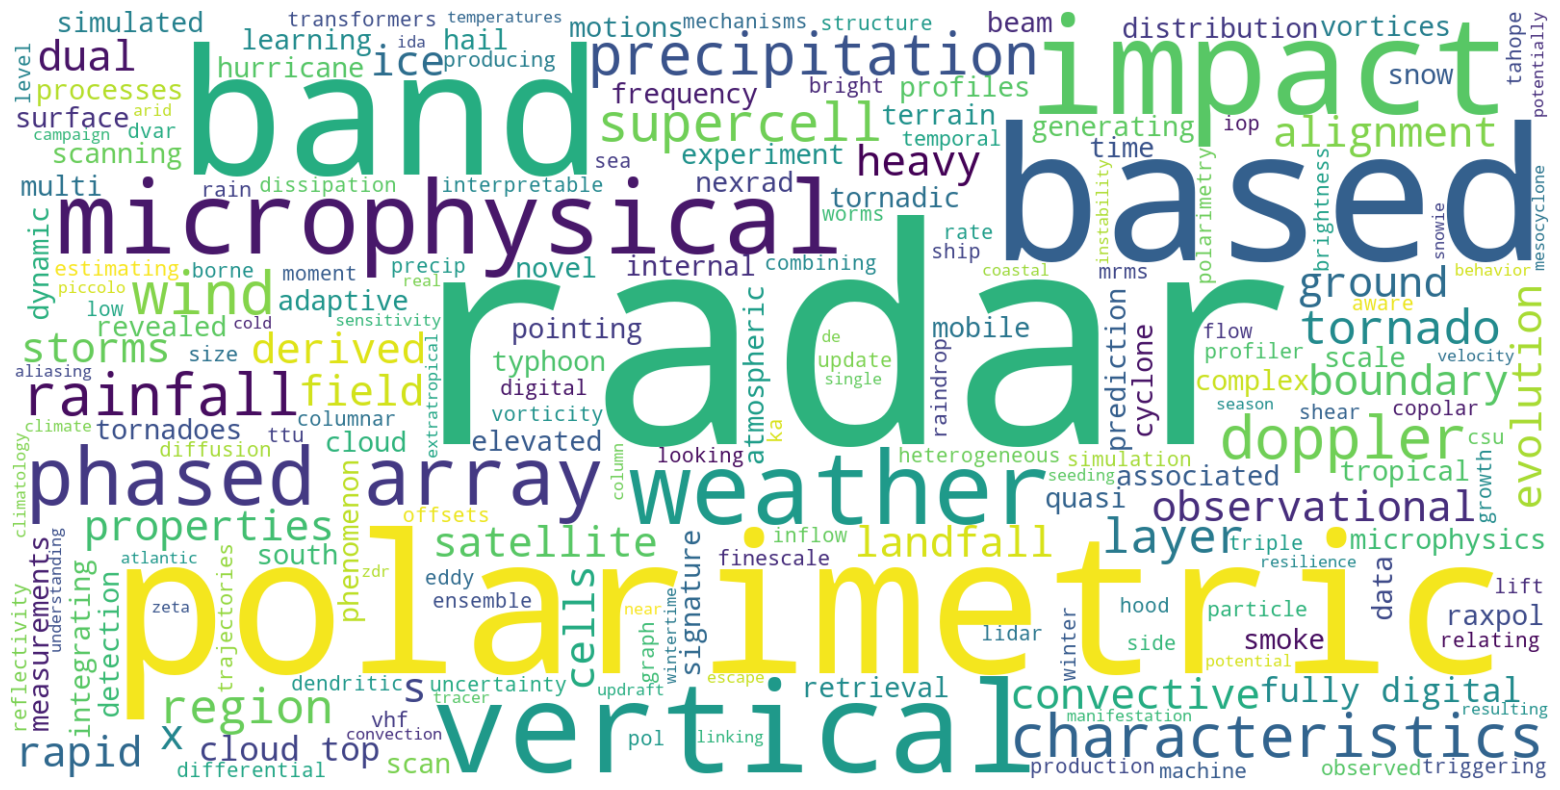

In [3]:
# Student presentation titles
titles = """
Polarimetric and MRMS Observations of Hail-Producing Storms Using a Fully-Digital, S-Band Phased Array Radar
Temporal Evolution of Cloud-Top Generating Cells: A Case Study
Estimating Raindrop Size Distribution Using Vertical Pointing Observations of X-Band Radar and VHF Profiler
Developing a Machine Learning Adaptive Scanning Algorithm for Scanning Supercell Characteristics with Phased Array Radars
4D Ice Particle Trajectories Associated With Radar-Observed Cloud Top Generating Cells
Radar Bright Bands and Finescale Motions Near the Rain Snow Boundary: Observational Insights from IMPACTS
Interpretable AI Nowcasting of Convective Systems with Heterogeneous Graph Transformers and Diffusion-Based Uncertainty Modeling
Radar and Microphysical Properties in the "Dendritic Growth" Layer of Winter Storms: Findings from IMPACTS
Impact of Wind Shear on Eddy Dissipation Rate Estimation from S-band Weather Radar
Radar-Derived Insights of Microphysical Processes during PRECIP 2022
TTU-Ka Mobile Doppler Radar Analysis of Tornado Structure from the Low-Level Internal Flow of Tornadoes (LIFT) Experiment
Radar/Lidar Observations of Surface-Layer Vertical Vorticity Worms in Supercell Inflow
Investigation of Copolar Pointing Offsets on the Differential Reflectivity Estimate for Fully-Digital Polarimetric Phased Array Weather Radar
Towards Developing a Microphysical Retrieval Based on Beam-aware Columnar Vertical Profiles: Combining Side-looking Polarimetry with Vertical Radar Measurements
The Precipitation Processes and Triggering Mechanisms of a Heavy Rainfall Event During 2022 TAHOPE Field Experiment IOP#1 Revealed by a Rapid-Update 4DVar Analysis System
Impacts of Triple-Moment Microphysics on Tornado Production in an Ensemble Simulation Framework
What's Under the Hood? Relating Ship-borne CSU SEA-POL Radar Observations to Satellite Brightness Temperatures in the Tropical Atlantic during the PICCOLO Field Campaign
Sensitivity of Cloud Top to Radar Frequency
Ground-Based Radar Observations of Boundary Layer Wind Profiles and Near-Surface Wind Estimation during the Landfalls of Hurricanes Ida (2021) and Zeta (2020)
Linking Vertical Velocity and Microphysical Properties in Convective Cells: Multi-Doppler and Polarimetric Radar Observations from TRACER / ESCAPE
A Doppler Radar Climatology of Vertical Updraft and Mesocyclone Alignment in Supercells
Simulated and Observed X-band ZDR Column Behavior in Potentially Tornadic Supercells
Toward Improved Understanding of Internal Boundary Layers during Hurricane Landfalls using Coastal Doppler Radars
Integrating AI and Radar systems for Enhanced wind forecasting in Arid Regions: Toward Real -Time Climate Resilience
De-aliasing Algorithm for Doppler Cloud Radar Measurements: A Single-band and Dual-band Approach
Enhanced Cold Season Precipitation Based on Atmospheric Dynamics in Complex Terrain
A SNOWIE Ground-Based Cloud Seeding Modeling and Observational Case Study
Manifestation of Elevated Convection within Wintertime Extratropical Cyclones during IMPACTS: Quantifying Elevated Potential Instability Characteristics and Resulting Hydrometeor Vertical Motions
Improvement of Short-Time Rainfall Prediction Method Using MP-PAWR
TITAN-LSTM: EVALUATION OF RAINFALL DISTRIBUTION NOWCASTING
Synthesizing Airborne Observations from IMPACTS to Examine Snow Microphysics in Regions of Enhanced Integrated Water Vapor Transport
A Model for Estimation of Electric Field Intensity Using the Polarimetric Ice Alignment Signature in Thunderstorms
Microphysical Evolution of Heavy Rainfall during a Bow Echo Event in South China: Characteristics and the Mesoscale-realted Impacts
Using a Novel Tropical Cyclone Radar Database to Observe Moderately Sheared Storms
An Observational Study of Quasi-Periodic Lightning Activity in the Inner Core of Super Typhoon Hato (2017) Before Landfall
Assimilating 3D Polarimetric Microphysical Retrievals in the Operational ICON Modelling Framework of the German Meteorological Service (DWD)
Enhancing Polarimetric Variable Estimation Using Adaptive Digital Beamforming for Phased Array Weather Radar
Improving Quantitative Precipitation Estimation in Complex Terrain Regions Through Integrating Ground-based Radar and Geostationary Satellite Observations
Characteristics of Antenna Cross-Polar Contamination and Its Impact on Polarimetric Spectra of Ice Alignment Signatures
A Study of the Simulated Scattering Properties of a Noctuid Moth for Aero-ecological Observation on Dual-Polarisation Weather Surveillance Radars
The Dynamical and Microphysical Characteristics of Heavy Rainfall in Hong Kong Caused by the Remnants of Typhoon Haikui Revealed by Dual-Polarization Radar Data
Using Deep Learning to Improve Regional Precipitation Nowcasting over the Santa Clara Valley
Novel Observations of Supercells and Tornadoes with the Horus Fully Digital S-band Polarimetric Phased Array Radar
The Educational and Outreach Activities Using the Mobile Rapid Scan X-Band Polarimetric (RaXPol) Radar During 2024-2025
Utilizing a Phased Array Radar System to Quantify the Scale and Magnitude of Atmospheric Phenomenon Unresolved by the NWS NEXRAD System
Radar-Based Validation of Satellite-Derived Hail Frequency Estimates across the Great Lakes Region
Waterspouts: A Radar-Based Analysis of a Severe Weather Phenomenon in the Persian Gulf
Polarimetric Spectral Densities within Tornado Vortices Probed by RaXPol
Rapid-Scan Radar Observations of Tornado-Scale Vortices in a Quasi-Linear Convective System on 3 March 2023 during PERiLS
Using the WISSDOM to Analyze the dynamic Characteristics and Associated Evolution of Squall Lines in Taiwan
Multi-Doppler Analyses of Tornadic Events with a NEXRAD-Coupled Multistatic Radar Network
Improving Radar Quantitative Precipitation Estimation Using GAN-Based Beam Blockage Correction
Enhanced Rainfall Nowcasting Using Hybrid Target Spectrum-Based Blending of Radar and Numerical Weather Prediction Model Data
Radar Discrete Wind Gust Identification Confirmation and Analysis
Radar-Based Detection and Tracking of Aerosol Plumes from Biomass Burning on the South African Highveld
Verification of WoFS-Smoke Forecasts using Polarimetric Observations from Weather Radar
Radar-Based Detection of Wind-Driven Smoke Dispersion During the 2024 Smokehouse Creek Fire
Quantifying Phased Array Radar-Derived Quantitative Precipitation Estimation with NSSL's Advanced Technology Demonstrator
"""

# Base + custom stopwords
stop = set(STOPWORDS)
stop |= {
    "using","based","during","toward","towards","with","without","within",
    "across","between","from","into","over","under","near",
    "system","systems","approach","study","case","event","events","analysis",
    "observations","observation","observed","investigation","insights","findings",
    "improving","improvement","improved","enhancing","enhanced","enhance",
    "evaluation","framework","quantifying","quantitative","estimation","estimate",
    "nowcasting","forecasting","model","modelling","modeling","algorithm","algorithms",
    "developing","development"
}
# NOTE: do NOT add 'radar'/'radars' so they remain visible

# Build a cleaned text string (optional; WordCloud can take raw text)
tokens = re.findall(r"[A-Za-z][A-Za-z\-']+", titles.lower())
tokens = [t.strip("-'") for t in tokens if len(t) > 2 and t not in stop]
clean_text = " ".join(tokens)

wc = WordCloud(
    width=1600, height=800,
    background_color="white",
    colormap="viridis"  # change if you like
).generate(clean_text)

plt.figure(figsize=(16,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.savefig("student-presentation-wordcloud.png", dpi=300)